Sklonujmy sobie najpierw repozytorium z danymi

In [1]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...


!ls ML-datasets 

# Budowa modelu na danych rzeczywistych

Funckje wczytujące dane:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Skorzystamy ze zbioru diabets:

In [3]:
X,y,classes = prepare_dataset('diabetes')

In [4]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.value_counts()

0    500
1    268
Name: class, dtype: int64

Podejrzyjmy co to za zbiór:

In [6]:
classes

array(['positive', 'negative'], dtype=object)

In [7]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
X.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
dtype: int64

Dzielimy dataset na zbiory treningowy i testowy

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [10]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: class, dtype: int64
0    125
1     67
Name: class, dtype: int64


Dzielenie ze stratyfikacją (parametry stratify = ) zapewnia, że udział obserwacji z danej zmiennej (w tym wypadku y) jest w obu zbiorach (train i test) taki sam. 

In [11]:
67/125

0.536

In [12]:
201/375

0.536

Trenujemy model na danych treningowych:

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [14]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Stwórzmy następnie macierz pomyłek i wyliczmy miary jakości klasyfikacji:

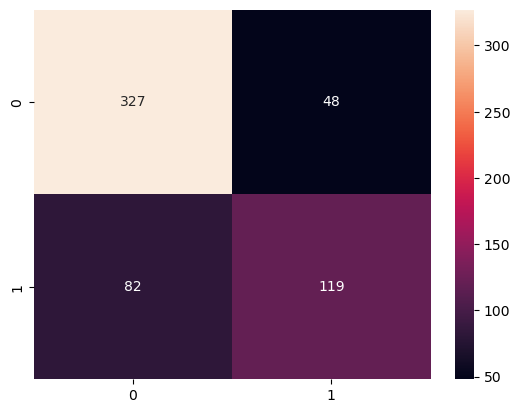

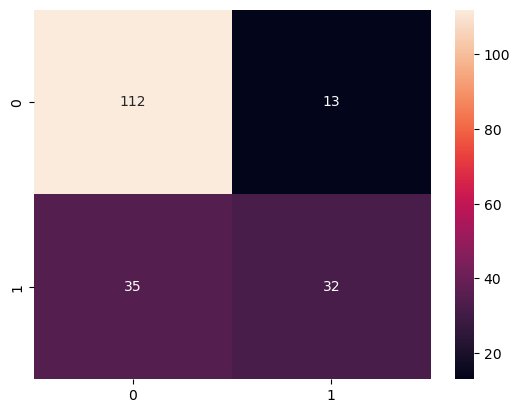

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [16]:
from sklearn.metrics import f1_score
print(f'F-Score train: {f1_score(y_train, y_pred_train)}, F-Score test: {f1_score(y_test, y_pred)}')

F-Score train: 0.6467391304347826, F-Score test: 0.5714285714285714


Możemy też obliczyć wartości pozostałych metryk klasyfikacji korzystając z wbudowanych funkcji.

Sprawdzenie też czy model jest przetrenowany:

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

In [18]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

In [19]:
df

,index,metric,value
0,train,accuracy,0.774306
1,test,accuracy,0.750000
2,train,precision,0.712575
3,test,precision,0.711111
4,train,recall,0.592040
5,test,recall,0.477612
6,train,f-score,0.646739
7,test,f-score,0.571429


Możemy jeszcze spróbować wyświetlić to w formie wykresu.

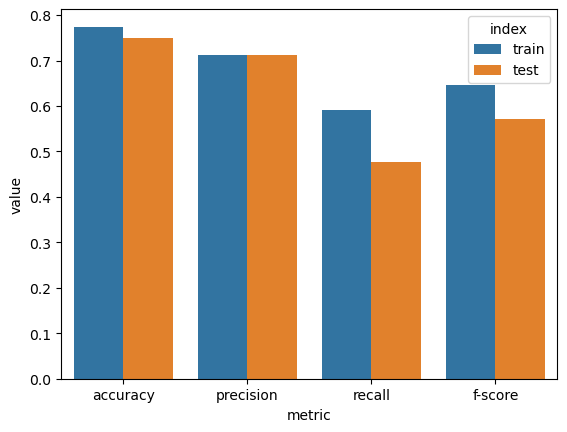

In [20]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df);

Możemy też regresję logistyczną zastosować dla zbiorów o wielu etykietach. Stosujemy wówczas strategię One versus Rest (trenujemy tyle klasyfikatorów, ile mamy klas) - sklearn robi to automatycznie.

In [21]:
X, y, classes = prepare_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=30)

In [22]:
y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [23]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

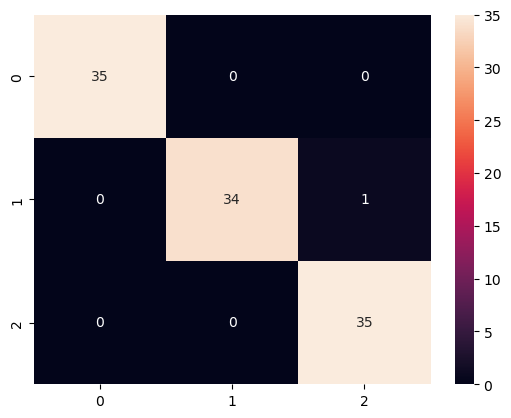

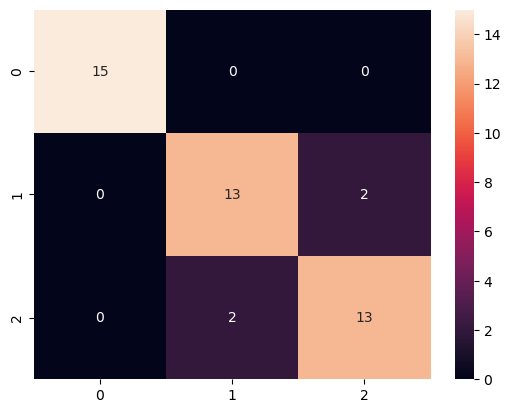

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [27]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')

precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred, average='macro')

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

In [29]:
df_dict = {'train':[accuracy_train, precision_train, recall_train, f1_train],
          'test': [accuracy_test, precision_test, recall_test, f1_test]}

df = pd.DataFrame\
.from_dict(df_dict,
           orient = 'index',
           columns = ['accuracy', 'precision', 'recall', 'f-score'])\
.reset_index()\
.melt(id_vars = 'index', var_name = 'metric')

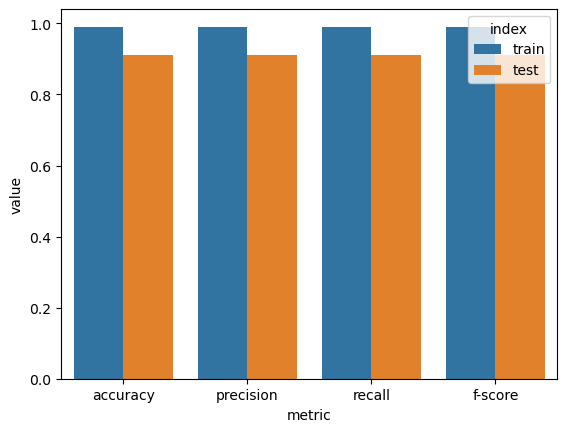

In [30]:
sns.barplot(x='metric', y = 'value', hue = 'index', data =df);

**Zadanie:**

Dla zbioru danych diabets wytrenuj model regresji logistycznej i narysuj krzywą ROC. Zwróć uwagę na różnice w funkcjach:
* predict()
* predict_proba()

Patrząc na krzywą ROC zastanów się czy model jest dobrze wytrenowany, przetrenowany czy wytrenowany niewystarczająco dobrze.

In [31]:
X,y,classes = prepare_dataset('diabetes')

In [32]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int8

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [35]:
len(X_train)

576

In [36]:
len(X_test)

192

In [37]:
X_train.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
71,5,139,64,35,140,28.6,0.411,26
118,4,97,60,23,0,28.2,0.443,22
699,4,118,70,0,0,44.5,0.904,26
409,1,172,68,49,579,42.4,0.702,28
375,12,140,82,43,325,39.2,0.528,58


In [38]:
y_train.head()

71     0
118    0
699    0
409    1
375    1
Name: class, dtype: int8

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=30, max_iter = 500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=30)

In [40]:
X_test.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
709,2,93,64,32,160,38.0,0.674,23
324,2,112,75,32,0,35.7,0.148,21
365,5,99,54,28,83,34.0,0.499,30
502,6,0,68,41,0,39.0,0.727,41
424,8,151,78,32,210,42.9,0.516,36


In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [43]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_train = model.predict_proba(X_train)

In [44]:
y_pred_proba

array([[0.8483607 , 0.1516393 ],
       [0.82659022, 0.17340978],
       [0.79231066, 0.20768934],
       [0.98259146, 0.01740854],
       [0.20714684, 0.79285316],
       [0.69730402, 0.30269598],
       [0.73515904, 0.26484096],
       [0.77641203, 0.22358797],
       [0.17811132, 0.82188868],
       [0.95469412, 0.04530588],
       [0.7352704 , 0.2647296 ],
       [0.94639368, 0.05360632],
       [0.64285241, 0.35714759],
       [0.11789204, 0.88210796],
       [0.88354296, 0.11645704],
       [0.94412258, 0.05587742],
       [0.88089573, 0.11910427],
       [0.25806521, 0.74193479],
       [0.95038846, 0.04961154],
       [0.76047088, 0.23952912],
       [0.79407315, 0.20592685],
       [0.47961041, 0.52038959],
       [0.78566741, 0.21433259],
       [0.75662653, 0.24337347],
       [0.12523274, 0.87476726],
       [0.83390907, 0.16609093],
       [0.67447348, 0.32552652],
       [0.98289167, 0.01710833],
       [0.99293878, 0.00706122],
       [0.60126337, 0.39873663],
       [0.

W przypadku modeli, które oferują logikę, wg. któtej wynik może być interpretowany jako prawdopodobieństwo, możemy użyć funkcji preict_proba(). Wynikiem będzie tutaj macierz, w lewej kolumnie będzie zawierała prawdopodobieństwo, że próbka jest klasą 0, w prawej, że jest klasą 1.

Korzystając z wbudwanej funkcji sklearn roc_auc_score importowanej podobnie jak accuracy_score, precision_score, recall_score, f1_score z modułu sklearn.metrics oblicz pole pod krzywą ROC:

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate=False)
fpr_t, tpr_t, treshold_t = roc_curve(y_train, y_pred_proba_train[:,1], drop_intermediate=False)

In [46]:
import matplotlib.pyplot as plt

def plot_roc(fpr_t, tpr_t, fpr, tpr):
    plt.figure(figsize = (10,6))
    plt.plot(fpr_t, tpr_t, c = 'red', label = 'Train')
    plt.plot(fpr, tpr, c = 'blue', label = 'Test')
    plt.axis([0,1,0,1])
    plt.plot([0,1], [0,1], 'k--', c ='black')
    plt.title('ROC')
    plt.legend()

C:\Users\kacpe\AppData\Local\Temp\ipykernel_9652\2915646692.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', c ='black')


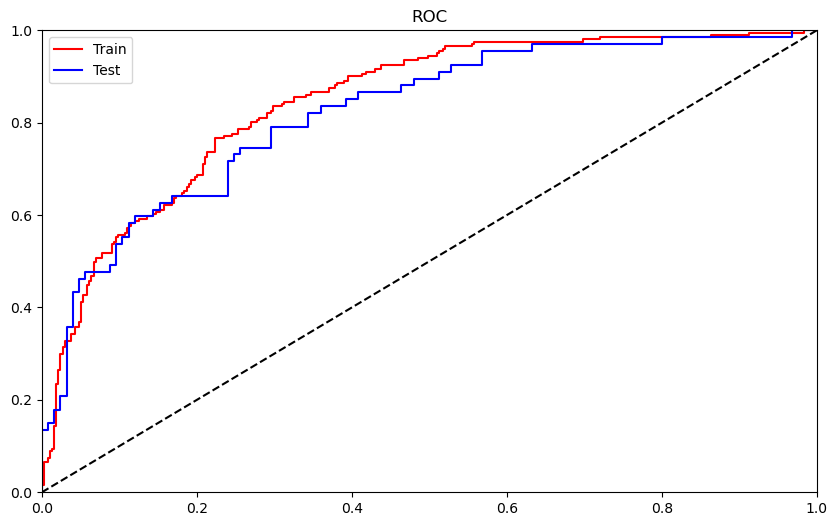

In [47]:
plot_roc(fpr_t, tpr_t, fpr, tpr)

Analiza punktów odcięcia:

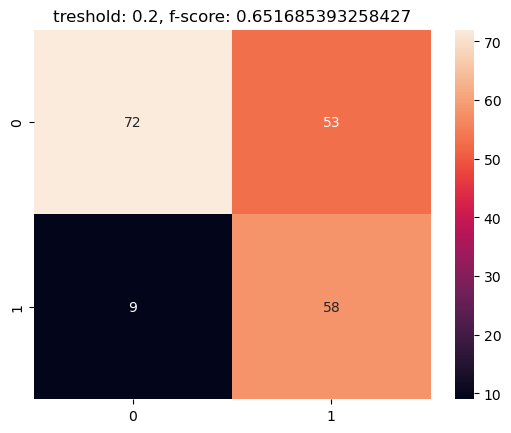

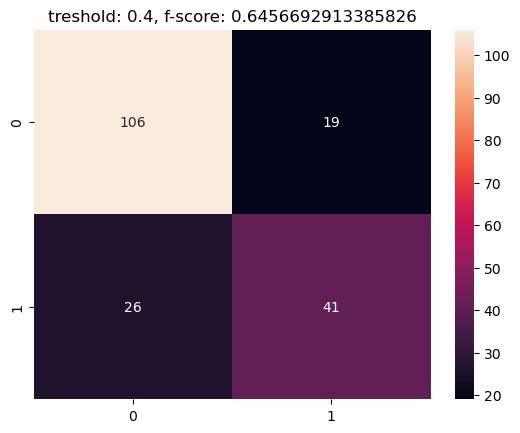

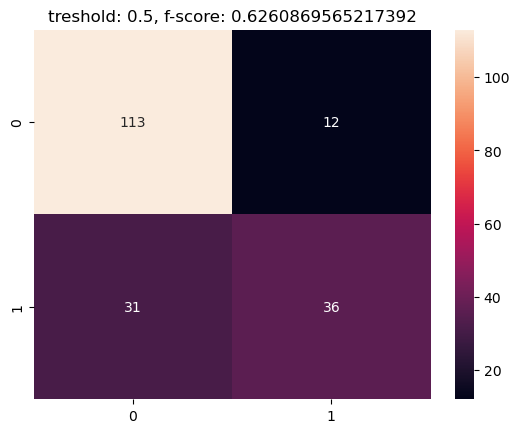

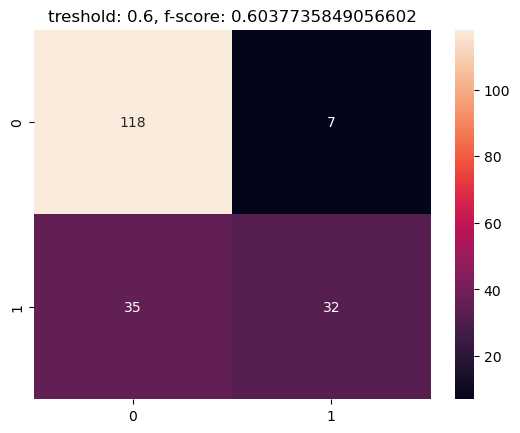

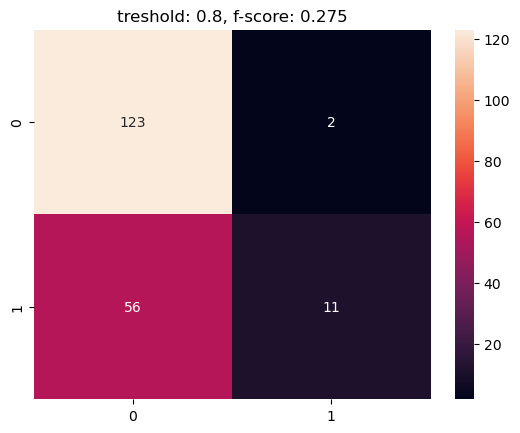

In [48]:
tresholds = [0.2, 0.4, 0.5, 0.6, 0.8]

for treshold in tresholds:
    y_pred = []
    for y in y_pred_proba[:,1]:
        if y > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    cm = confusion_matrix(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd')
    title = f'treshold: {treshold}, f-score: {f}'
    plt.title(title)
    plt.show()
    

In [49]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
auc_test = roc_auc_score(y_test, y_pred_proba[:,1])

print(f'Pole pod krzywą ROC dla zestawu treningowego: {round(auc_train,2)}')
print(f'Pole pod krzywą ROC dla zestawu testowego: {round(auc_test,2)}')

Pole pod krzywą ROC dla zestawu treningowego: 0.84
Pole pod krzywą ROC dla zestawu testowego: 0.82


**Zadanie:** Przetestuj walidację krzyżową na analizowanym wcześniej zbiorze:

In [50]:
from sklearn.model_selection import cross_val_score

iteracja 1: trening: a,b,c,d, test: e <br>
iteracja 2: trening: a,b,c,e, test: d <br>
iteracja 3: trening: a,b,d,e, test: c <br>
iteracja 4: trening: a,c,d,e, test: b <br>
iteracja 5: trening: b,c,d,e, test: a <br>

In [52]:
X,y,classes = prepare_dataset('diabetes')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=30)

In [53]:


model = LogisticRegression(random_state = 30, max_iter = 500)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision_macro',)

In [54]:
scores

array([0.70767575, 0.64978214, 0.77505447, 0.80588235, 0.8331044 ])

# Regularyzacja, czyli jak przeciwdziałać overfittingowi. Czy to jest w ogóle problem? Sprawdźmy!

In [55]:
wine, wine_classes = load_dataset('wine', 'Class')

In [56]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [57]:
y = wine.pop('class')

In [58]:
X = wine

In [59]:
y.value_counts()

2    71
0    59
1    48
Name: class, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, stratify=y, random_state=30)
model = LogisticRegression(random_state=30, max_iter=100)
model.fit(X_train, y_train)

C:\Users\kacpe\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [61]:
#from sklearn import make_scorer

model = LogisticRegression(random_state = 30, max_iter = 1500)

scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')

C:\Users\kacpe\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kacpe\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [62]:
print(scores_precision)
print(scores_recall)

[0.97435897 0.96296296 0.91538462 0.96296296 0.89469697]
[0.96666667 0.97222222 0.89722222 0.97222222 0.89772727]


In [63]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Regularyzacja:

In [ ]:
model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=0.1)
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

f_train = f1_score(y_train, y_pred_train, average='weighted')
f_test = f1_score(y_test, y_pred, average='weighted')

print(f'f-score na zbiorze treningowym: {f_train}')
print(f'f-score na zbiorze testowym: {f_test}')

Przetestujmy teraz jednocześnie wiele wartości parametru regularyzacji

In [ ]:
import numpy as np

C_values = [10.0**x for x in np.arange(-3,2,1)]

print(C_values)

In [ ]:
train_err = []
valid_err = []

for C_value in C_values:
    model = LogisticRegression(random_state=30, max_iter=100, penalty = 'l2', C=C_value)
    model.fit(X_train, y_train)
    
    train_err.append(model.score(X_train, y_train))
    valid_err.append(model.score(X_test, y_test))

In [ ]:
train_err

In [ ]:
plt.semilogx(C_values, train_err, C_values, valid_err)
plt.legend(('train', 'validation'))
plt.show()

Skorzystajmy teraz z metody Grid Search. Regularyzacja l1 udostępnia selekcję cech, o możemy zobaczyć tu:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression(solver ='liblinear', random_state=30)

params = {'C':[10.0**x for x in np.arange(-3,2,1)],
         'penalty': ['l1', 'l2'],
         'max_iter': [100, 300, 500]}

In [ ]:
searcher = GridSearchCV(lr, param_grid=params, cv = 3, n_jobs=-1)
searcher.fit(X_train, y_train)

In [ ]:
best_lr = searcher.best_estimator_
best_params = searcher.best_params_

Sprawdźmy też jakie wartości współczynników wyznaczyła regresja rozwiązując naszy układ równań:

In [ ]:
coefs = best_lr.coef_

In [ ]:
coefs

In [ ]:
best_params

# Granice decyzyjne na sztucznie wygenerowanym zbiorze:

Zaczniemy od wygenerowania sztucznego zbioru do klasyfikacji, składającego się z dwóch zbiorów punktów z rozkładu normalnego.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))

train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

In [65]:
train_data.shape

(200, 2)

In [66]:
train_data[:10]

array([[ 1.05337383, -0.20059054],
       [ 0.69495118,  0.7654857 ],
       [-2.6221522 ,  0.2972916 ],
       [ 1.51040039,  0.25480384],
       [ 1.56429243, -0.12258696],
       [ 1.27606926, -0.27758475],
       [ 1.34744278, -0.5673992 ],
       [ 0.46552986,  0.03945125],
       [-0.22495418,  1.09442436],
       [ 0.84865797, -0.59690334]])

In [67]:
train_data.shape

(200, 2)

In [68]:
train_labels[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów:

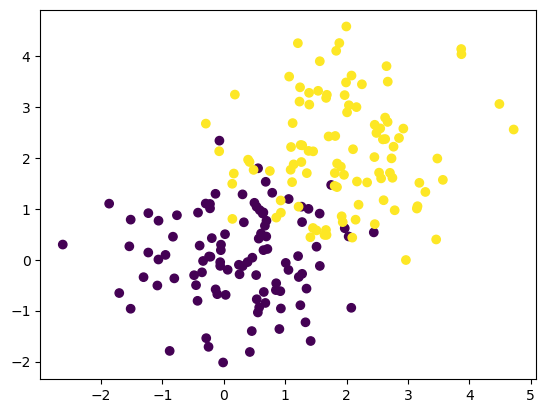

In [69]:
fig, ax = plt.subplots()

ax.scatter(train_data[:,0], train_data[:,1], c =train_labels)

Na tak utworzonym zbiorze wytrenujemy model regresji logistycznej

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression()

Stwórzmy zbiór testowy poprzez rozszerzenie zakresu zbioru treningowego.

In [71]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [72]:
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [73]:
print(xs.shape)
print(ys.shape)

(860, 935)
(860, 935)


In [74]:
y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [75]:
print(y_pred.shape)

(804100,)


In [76]:
y_pred_matrix = y_pred.reshape(xs.shape)

In [77]:
y_pred_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób regresja logistyczna dokonała podziału przestrzeni.

In [78]:
for x,y, pred in zip(xs, ys, y_pred_matrix):
    print(x, y, pred)
    
    break

[-3.62215220e+00 -3.61215220e+00 -3.60215220e+00 -3.59215220e+00
 -3.58215220e+00 -3.57215220e+00 -3.56215220e+00 -3.55215220e+00
 -3.54215220e+00 -3.53215220e+00 -3.52215220e+00 -3.51215220e+00
 -3.50215220e+00 -3.49215220e+00 -3.48215220e+00 -3.47215220e+00
 -3.46215220e+00 -3.45215220e+00 -3.44215220e+00 -3.43215220e+00
 -3.42215220e+00 -3.41215220e+00 -3.40215220e+00 -3.39215220e+00
 -3.38215220e+00 -3.37215220e+00 -3.36215220e+00 -3.35215220e+00
 -3.34215220e+00 -3.33215220e+00 -3.32215220e+00 -3.31215220e+00
 -3.30215220e+00 -3.29215220e+00 -3.28215220e+00 -3.27215220e+00
 -3.26215220e+00 -3.25215220e+00 -3.24215220e+00 -3.23215220e+00
 -3.22215220e+00 -3.21215220e+00 -3.20215220e+00 -3.19215220e+00
 -3.18215220e+00 -3.17215220e+00 -3.16215220e+00 -3.15215220e+00
 -3.14215220e+00 -3.13215220e+00 -3.12215220e+00 -3.11215220e+00
 -3.10215220e+00 -3.09215220e+00 -3.08215220e+00 -3.07215220e+00
 -3.06215220e+00 -3.05215220e+00 -3.04215220e+00 -3.03215220e+00
 -3.02215220e+00 -3.01215

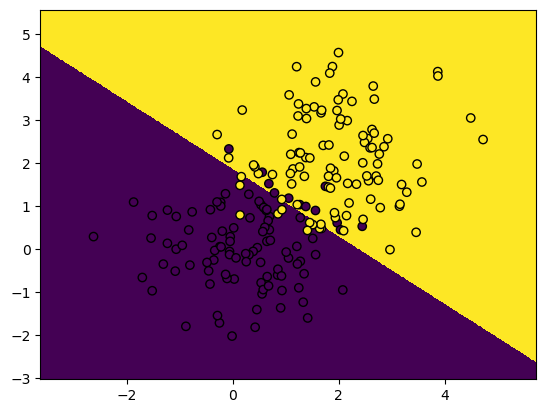

In [79]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()

Zwróćmy uwagę na fakt, że jest tutaj linia prosta.